# 섬진강유역 12개 강우관측소와 IMERG 관측데이터의 비교

## 1. 필요한 라이브러리 넣기

In [1]:
import pandas as pd
import datetime
from datetime import timedelta

## 2. 관측데이터 확인 (데이터 개수: 61,385개): 2014-09-30 1시 ~ 2021-10-01 0시

In [2]:
# "SJ_hourly_rainfall_re.csv"는 Station 관측데이터로써 분석기간은 2014-10-01 01시부터 이지만 한국시간이 
#  UTC(Coordinated Universial Time) 시간기준보다 9시간 빨라서 
# 나중에 9를 더해줘야하므로 이를 고려하여 2014-10-01 01시 이전 24시간 데이터를 추가하여 2014-09-30 01시부터 정리 

obs_hourly_df = pd.read_csv("SJ_hourly_rainfall_re.csv")
print(len(obs_hourly_df))
obs_hourly_df.head()

61385


,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
0,2014093001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014093002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014093003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014093004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014093005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. 날짜 생성을 통한 전체기간 데이터 갯수확인 (데이터 개수: 61,392개): 7개 데이터 결측 (관측날짜 없는 결측)

 - 관측값의 경우 결측이 있을 수 있으므로 시작날짜, 종료날짜, 관측주기를 활용하여 전체기간 날짜 데이터 생성

In [3]:
# 2014년 10월 1일에서 2021년 9월 30일까지 1시간단위로 일시자료 생성
total_date_df = pd.DataFrame(
    {'date': pd.date_range(start='2014-09-30 01:00:00', end='2021-10-01 00:00:00', freq='1H'),
    }
)
print(len(total_date_df))
total_date_df

61392


,date
0,2014-09-30 01:00:00
1,2014-09-30 02:00:00
2,2014-09-30 03:00:00
3,2014-09-30 04:00:00
4,2014-09-30 05:00:00
...,...
61387,2021-09-30 20:00:00
61388,2021-09-30 21:00:00
61389,2021-09-30 22:00:00
61390,2021-09-30 23:00:00


## 4. 관측 데이터의 date 포맷을 datetime 포맷으로 변경

In [4]:
import datetime
from datetime import timedelta
dt_series = []
for date in obs_hourly_df['date']:
    day = int(str(date)[6:8])
    time = int(str(date)[8:10])
    if int(str(date)[8:10]) == 24:
        time = 0
        datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), day, 0, 0)
        datetimeobj = datetimeobj + timedelta(days=1)
    else:
        datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), day, time, 0)
    dt_series.append(datetimeobj)
dt_series

[datetime.datetime(2014, 9, 30, 1, 0),
 datetime.datetime(2014, 9, 30, 2, 0),
 datetime.datetime(2014, 9, 30, 3, 0),
 datetime.datetime(2014, 9, 30, 4, 0),
 datetime.datetime(2014, 9, 30, 5, 0),
 datetime.datetime(2014, 9, 30, 6, 0),
 datetime.datetime(2014, 9, 30, 7, 0),
 datetime.datetime(2014, 9, 30, 8, 0),
 datetime.datetime(2014, 9, 30, 9, 0),
 datetime.datetime(2014, 9, 30, 10, 0),
 datetime.datetime(2014, 9, 30, 11, 0),
 datetime.datetime(2014, 9, 30, 12, 0),
 datetime.datetime(2014, 9, 30, 13, 0),
 datetime.datetime(2014, 9, 30, 14, 0),
 datetime.datetime(2014, 9, 30, 15, 0),
 datetime.datetime(2014, 9, 30, 16, 0),
 datetime.datetime(2014, 9, 30, 17, 0),
 datetime.datetime(2014, 9, 30, 18, 0),
 datetime.datetime(2014, 9, 30, 19, 0),
 datetime.datetime(2014, 9, 30, 20, 0),
 datetime.datetime(2014, 9, 30, 21, 0),
 datetime.datetime(2014, 9, 30, 22, 0),
 datetime.datetime(2014, 9, 30, 23, 0),
 datetime.datetime(2014, 10, 1, 0, 0),
 datetime.datetime(2014, 10, 1, 1, 0),
 datetime.d

In [5]:
# date의 날짜를 datetime 포맷으로 변경
obs_hourly_df["date"] = dt_series
obs_hourly_df

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
0,2014-09-30 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014-09-30 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-09-30 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-09-30 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-09-30 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61380,2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61381,2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61382,2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61383,2021-09-30 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. 전체기간에 관측 데이터를 합치기

In [6]:
obs_total_df = pd.merge(total_date_df, obs_hourly_df, on="date", how="left")
obs_total_df

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
0,2014-09-30 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014-09-30 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-09-30 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-09-30 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-09-30 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61387,2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61388,2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61389,2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61390,2021-09-30 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. 열별로 하나의 결측값이라도 있을 경우 결측된 값을 확인: 18개 행에서 결측 발생

In [7]:
print(len(obs_total_df[obs_total_df.isna().any(axis=1)]))
obs_total_df[obs_total_df.isna().any(axis=1)]

18


,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
5462,2015-05-15 15:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9451,2015-10-28 20:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18080,2016-10-22 09:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26553,2017-10-10 10:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26699,2017-10-16 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27839,2017-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27884,2017-12-04 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27957,2017-12-07 22:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28019,2017-12-10 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28171,2017-12-16 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. 결측된 값을 Interpolation을 통해 보완

In [8]:
col_name = list(obs_total_df)[1:]
col_name

['4001430',
 '4001440',
 '4001450',
 '4003420',
 '4007450',
 '4007470',
 '4007472',
 '4007474',
 '4009460',
 '9000140',
 '9000233',
 '9000234']

In [9]:
# 결측이 없음을 확인함
obs_total_df[col_name] = obs_total_df[col_name].interpolate(method="pad")
obs_total_df[obs_total_df.isna().any(axis=1)]

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234


In [10]:
obs_total_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
0,2014-09-30 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014-09-30 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-09-30 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-09-30 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-09-30 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
obs_total_df1 = obs_total_df.set_index("date")
obs_total_df1

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
date,,,,,,,,,,,,
2014-09-30 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-30 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-30 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-30 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-30 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8. 분석을 위한 강우관측자료: '14.10.1 01~'21.10.01 00시

In [12]:
obs_total_df_f = obs_total_df1.loc["2014-10-01 01:00:00":'2021-10-01 00:00:00']
obs_total_df_f

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
date,,,,,,,,,,,,
2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 9. IMERG 데이터 읽기

* 현재데이터는 NetCDF포맷의 GPM자료를 관측소와 동일한 픽셀별로 정리한 CSV파일을 불러오는 것에서 시작

In [13]:
from glob import glob
gpm_30min_list = sorted(glob(f'*30min.csv'))
gpm_30min_list

['4001430_30min.csv',
 '4001440_30min.csv',
 '4001450_30min.csv',
 '4003420_30min.csv',
 '4007450_30min.csv',
 '4007470_30min.csv',
 '4007472_30min.csv',
 '4007474_30min.csv',
 '4009460_30min.csv',
 '9000140_30min.csv',
 '9000233_30min.csv',
 '9000234_30min.csv']

In [14]:
gpm_30min_df = pd.read_csv(gpm_30min_list[0])
print(len(gpm_30min_df))
gpm_30min_df.head()

135840


,date,rainfall
0,2014-01-01 00:00:00,0
1,2014-01-01 00:30:00,0
2,2014-01-01 01:00:00,0
3,2014-01-01 01:30:00,0
4,2014-01-01 02:00:00,0


In [15]:
gpm_30min_df.tail()

,date,rainfall
135835,2021-09-30 21:30:00,0
135836,2021-09-30 22:00:00,0
135837,2021-09-30 22:30:00,0
135838,2021-09-30 23:00:00,0
135839,2021-09-30 23:30:00,0


In [16]:
# 2014년 1월 1일에서 2021년 9월 30일까지 1시간단위로 일시자료 생성
gpm_30min_df = pd.DataFrame(
    {'date': pd.date_range(start='2014-01-01 00:00:00', end='2021-09-30 23:30:00', freq='30T'),
    }
)
print(len(gpm_30min_df))
gpm_30min_df

135840


,date
0,2014-01-01 00:00:00
1,2014-01-01 00:30:00
2,2014-01-01 01:00:00
3,2014-01-01 01:30:00
4,2014-01-01 02:00:00
...,...
135835,2021-09-30 21:30:00
135836,2021-09-30 22:00:00
135837,2021-09-30 22:30:00
135838,2021-09-30 23:00:00


In [17]:
for list in gpm_30min_list:
    gpm_30min_df[list.split("_")[0]+"_gpm"] = pd.read_csv(list.split("_")[0]+"_30min.csv")["rainfall"].values
gpm_30min_df

,date,4001430_gpm,4001440_gpm,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-01-01 00:30:00,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0
3,2014-01-01 01:30:00,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135835,2021-09-30 21:30:00,0,0,0,0,0,0,0,0,0,0,0,0
135836,2021-09-30 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0
135837,2021-09-30 22:30:00,0,0,0,0,0,0,0,0,0,0,0,0
135838,2021-09-30 23:00:00,0,0,0,0,0,0,0,0,0,0,0,0


## 10. 원본 GPM데이터의 UTC시간대를 한국시간대(+9)로 변경

In [18]:
# UTC 시간변경에 따른 9시간과 Pandas의 resample을 통해서 30분단위를 1시간단위로 변경시 30분 shift를 고려하여 0.5 더함
gpm_30min_df["date"] = gpm_30min_df["date"] + timedelta(hours=9.5)
gpm_30min_df.head()

,date,4001430_gpm,4001440_gpm,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-01-01 09:30:00,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-01-01 10:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-01-01 10:30:00,0,0,0,0,0,0,0,0,0,0,0,0
3,2014-01-01 11:00:00,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-01-01 11:30:00,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
gpm_30min_df_index = gpm_30min_df.set_index("date")
gpm_30min_df1 = gpm_30min_df_index.loc["2014-10-01 01:00:00":'2021-10-01 00:00:00']
gpm_30min_df = gpm_30min_df1/10
gpm_hourly_f = gpm_30min_df.resample("1H").mean()
gpm_hourly_f

,4001430_gpm,4001440_gpm,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
date,,,,,,,,,,,,
2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_hourly_all = obs_total_df_f.join(gpm_hourly_f)
df_hourly_all

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
date,,,,,,,,,,,,,,,,,,,,,
2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(len(df_hourly_all[df_hourly_all.isna().any(axis=1)]))
df_hourly_all[df_hourly_all.isna().any(axis=1)]

0


,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
date,,,,,,,,,,,,,,,,,,,,,


In [22]:
df_hourly_all.describe()

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
count,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,...,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000
mean,0.143805,0.146819,0.167123,0.136895,0.161566,0.165510,0.154201,0.170952,0.156173,0.162544,...,0.163419,0.162697,0.172696,0.170643,0.171033,0.169605,0.172689,0.170089,0.173627,0.172696
std,1.149292,1.149825,1.243059,1.007257,1.232256,1.230926,1.150212,1.264913,1.221712,1.195818,...,0.966391,0.975777,1.036119,1.051781,1.037997,1.063651,1.038912,1.029310,1.046218,1.036119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,55.000000,69.000000,70.000000,64.000000,85.000000,46.000000,64.000000,58.000000,80.000000,48.000000,...,35.200000,49.100000,36.650000,47.100000,48.950000,55.000000,41.050000,45.650000,45.050000,36.650000


## 11. DataSet을 2가지 Case로 분리

* Case-1 : IMERG와 Station관측자료 Raw 데이터 그대로 활용

* Case-2 : Station관측자료가 0일 경우, IMERG의 관측자료을 전부 0으로 수정

In [23]:
import numpy as np
df_hourly_all_case1 = df_hourly_all.copy()
df_hourly_all_case2 = df_hourly_all.copy()

In [24]:
for list in gpm_30min_list:
    df_hourly_all_case2[list.split("_")[0]+"_gpm"] = np.where(df_hourly_all_case2[list.split("_")[0]] == 0, df_hourly_all_case2[list.split("_")[0]], df_hourly_all_case2[list.split("_")[0]+"_gpm"])
df_hourly_all_case2.head()

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
date,,,,,,,,,,,,,,,,,,,,,
2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_hourly_all_case1.to_csv("sj_hourly_rainfall_case1.csv")
df_hourly_all_case2.to_csv("sj_hourly_rainfall_case2.csv")

## 12. (Case-1) Station관측과 IMERG자료의 선형분석 및 Visualization

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
from scipy import stats
from sklearn import linear_model

In [27]:
def density_scatter(x , y, st, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    fig = plt.figure(figsize=(20, 8))
    data, x_e, y_e = np.histogram2d(x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    axes = [ax1, ax2]
    for i, ax in enumerate(axes):

        if i == 0:
            ax.scatter(x, y, c=z, **kwargs )
            norm = Normalize(vmin = np.min(z), vmax = np.max(z))
            cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
            cbar.ax.set_ylabel('Density', fontsize=20)
            cbar.ax.tick_params(labelsize=20) 
            ax.set_title('Density Scatter Plot between Station(%i) \nand IMERG Observation' %st , fontsize=18)
            ax.set_xlabel('IMERG Observation (mm/h', fontsize=20)
            ax.set_ylabel('Station Observation (mm/h)', fontsize=20)
            xt = [0,20,40,60,80,100]
            ax.set_xlim([0,100])
            ax.set_ylim([0,100])
            ax.set_xticklabels(xt, fontsize=20)
            ax.set_yticklabels(xt, fontsize=20)
            
            x_pred = np.linspace(0, 100, 100)            
            x_pred = x_pred.reshape(-1, 1)  
            y_pred = model.predict(x_pred)
            
            ax.plot(x_pred, y_pred, color='k')
            ax.text(0.55, 0.2, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)
            
        else:
            ax.scatter(x, y, c=z, **kwargs )
            norm = Normalize(vmin = np.min(z), vmax = np.max(z))
            cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
            cbar.ax.set_ylabel('Density', fontsize=20)
            cbar.ax.tick_params(labelsize=20) 
            ax.set_title('Density Scatter Plot between Station(%i) \n and IMERG Observation' %st , fontsize=18)
            ax.set_xlabel('IMERG Observation (mm/h)', fontsize=20)
            ax.set_ylabel('Station Observation (mm/h)', fontsize=20)           
            ax.set_xlim([0,15])
            ax.set_ylim([0,15])
            xt = [0,2,4,6,8,10,12,14]
            ax.set_xticklabels(xt, fontsize=20)
            ax.set_yticklabels(xt, fontsize=20)
    return ax

### 12.1 STA. 4001430

In [28]:
st_id = "4001430"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4001430) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

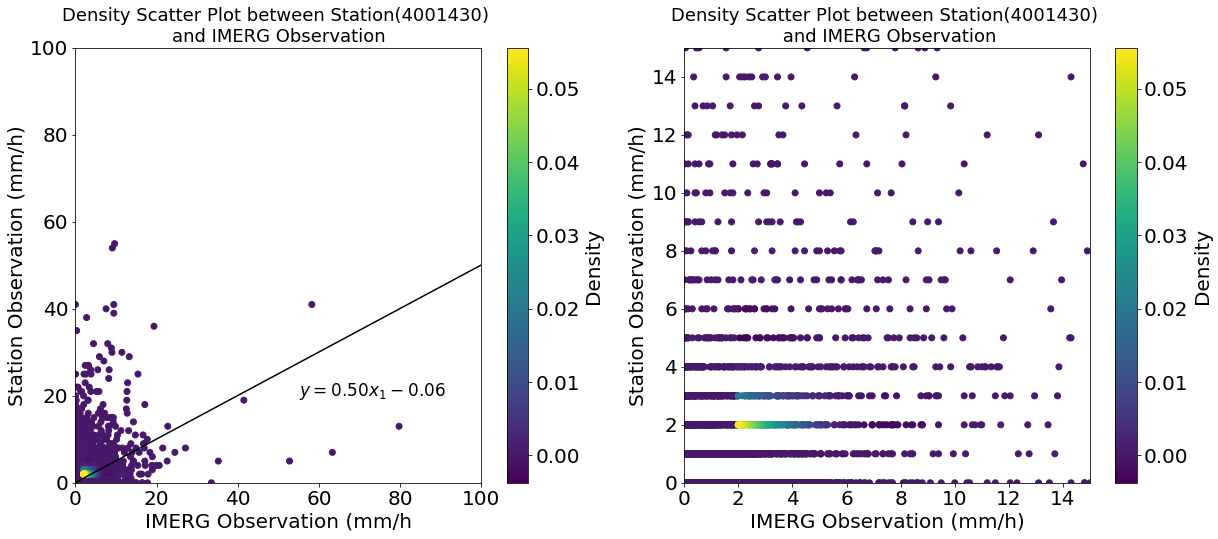

In [29]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.2 STA. 4001440

In [30]:
st_id = "4001440"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4001440) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

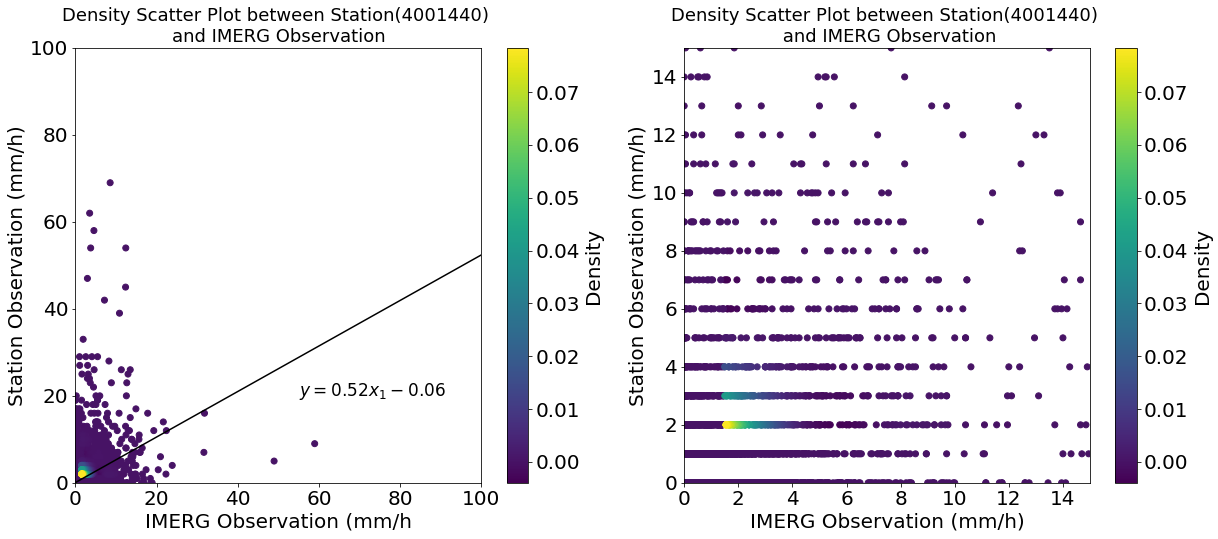

In [31]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.3 STA. 4001450

In [32]:
st_id = "4001450"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4001450) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

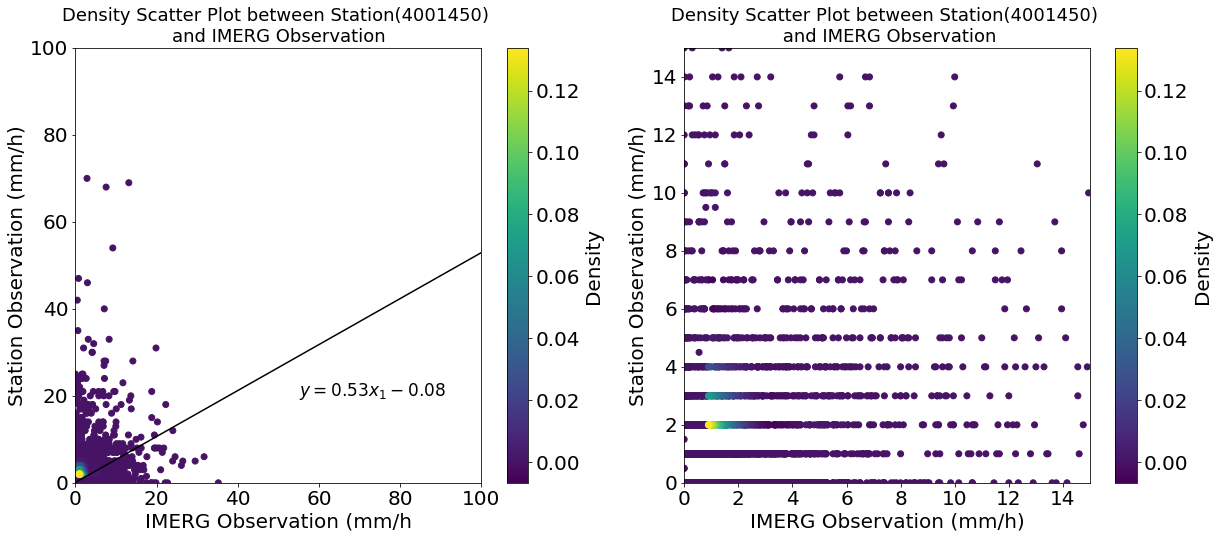

In [33]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.4 STA. 4003420

In [34]:
st_id = "4003420"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4003420) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

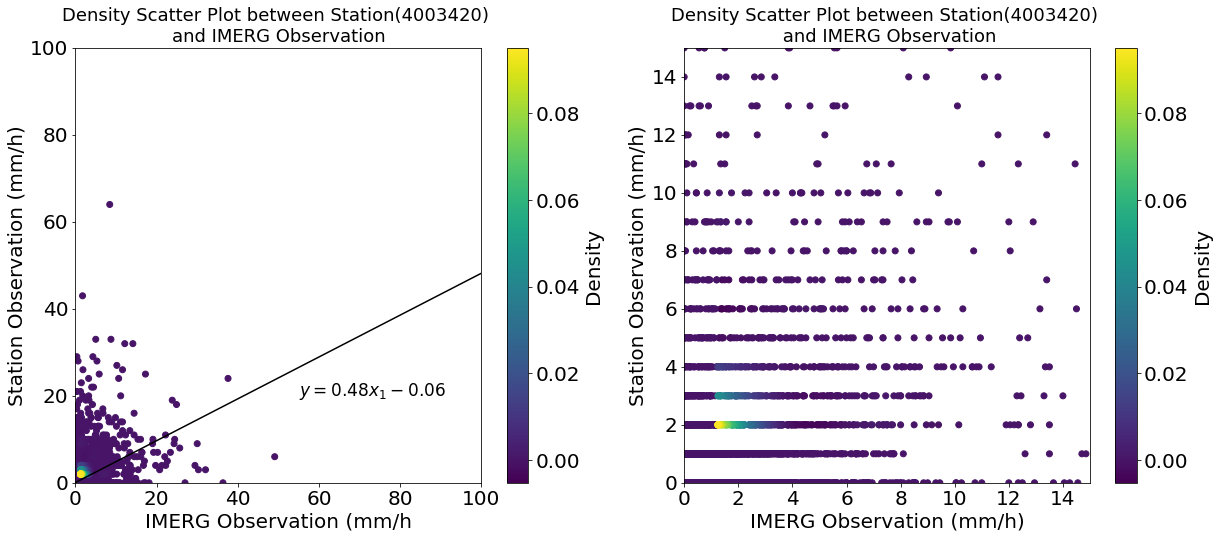

In [35]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.5 STA. 4007450

In [36]:
st_id = "4007450"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007450) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

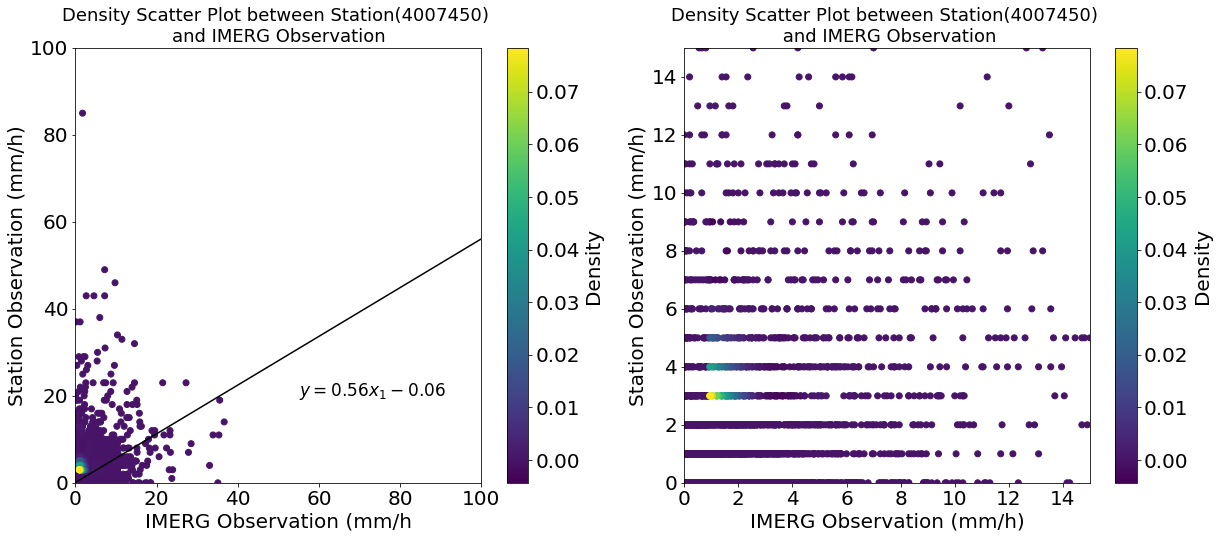

In [37]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.6 STA. 4007470

In [38]:
st_id = "4007470"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007470) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

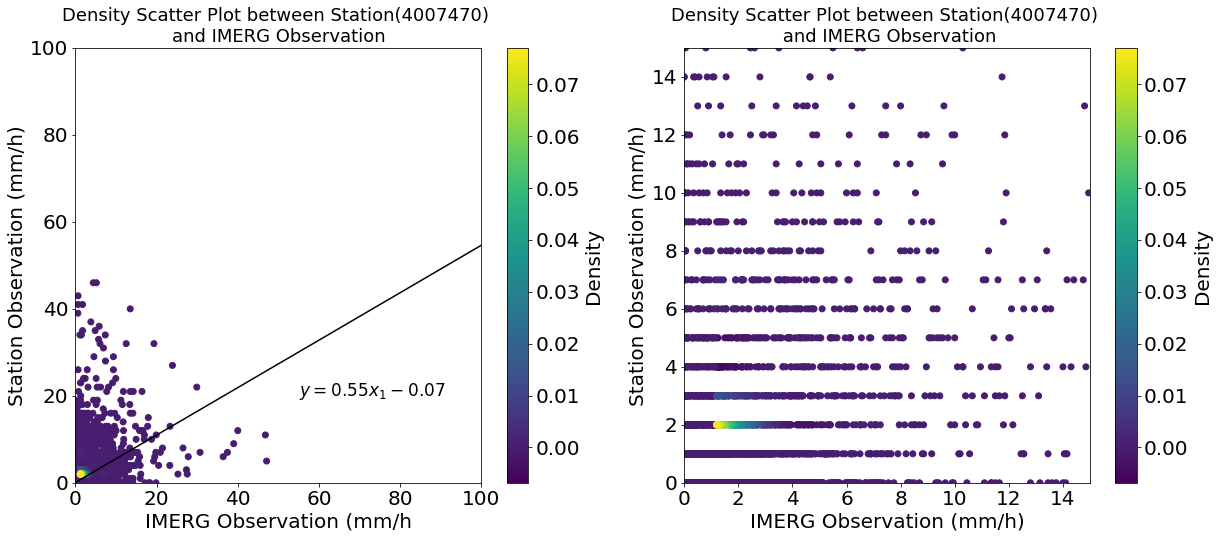

In [39]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.7 STA. 4007472

In [40]:
st_id = "4007472"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007472) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

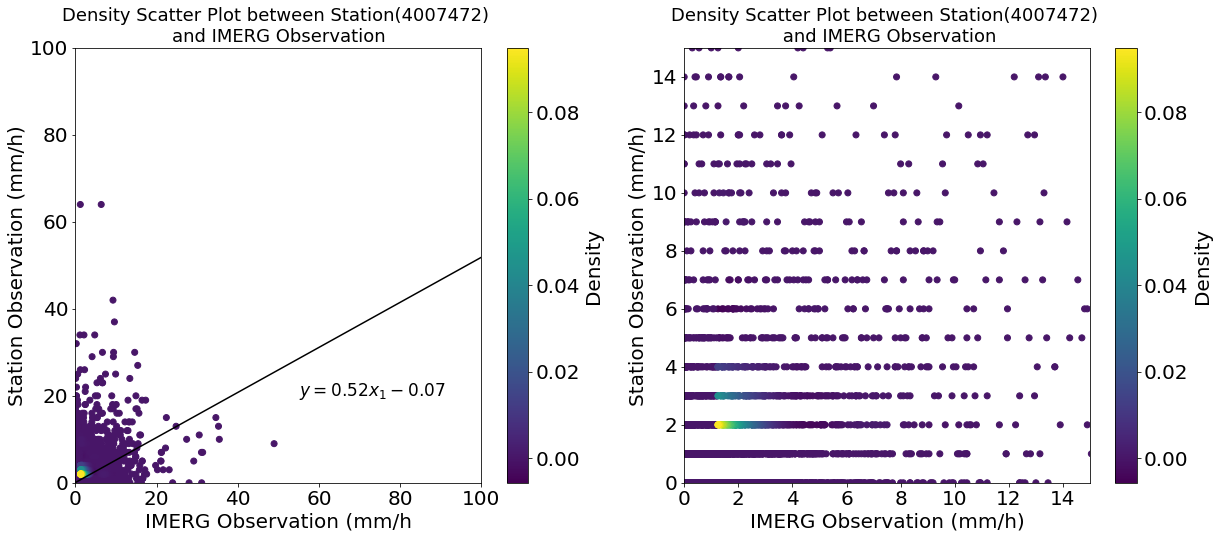

In [41]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.8 STA. 4007474

In [42]:
st_id = "4007474"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007474) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

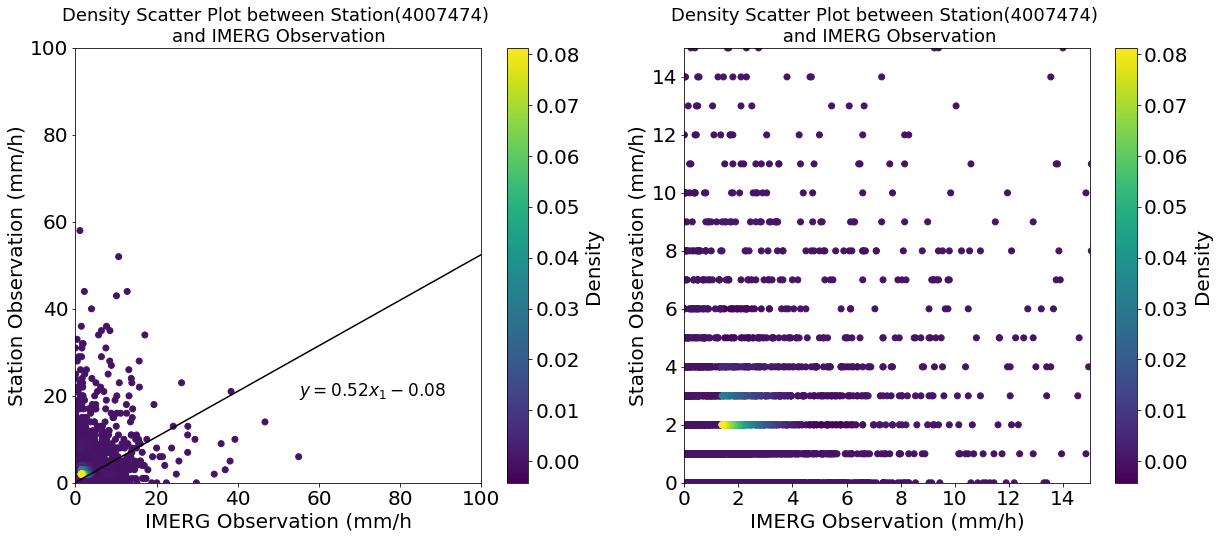

In [43]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.9 STA. 4009460

In [44]:
st_id = "4009460"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4009460) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

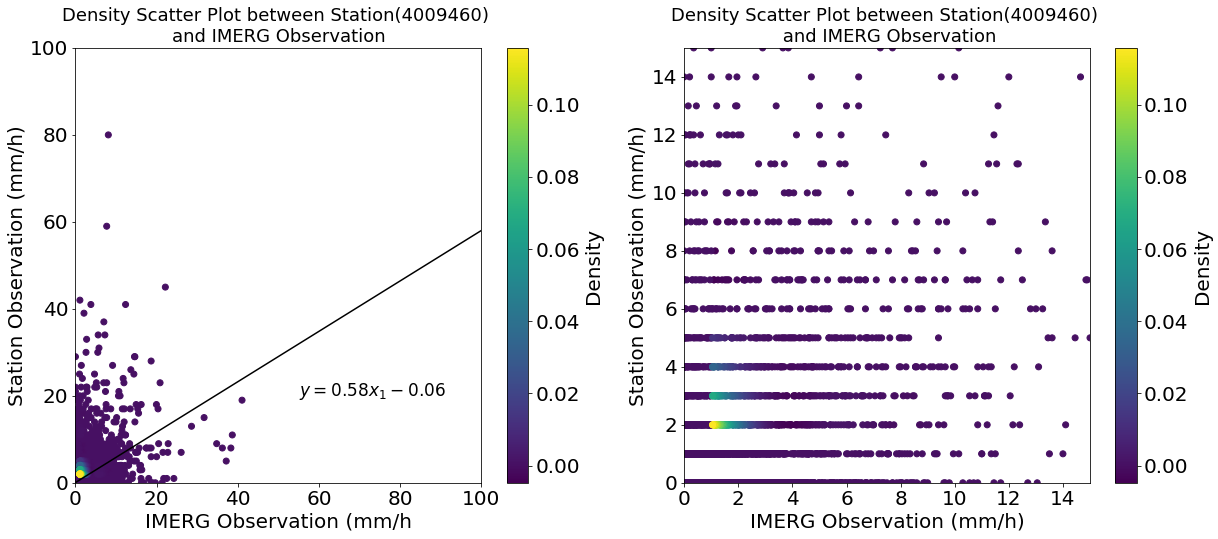

In [45]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.10 STA. 9000140

In [46]:
st_id = "9000140"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(9000140) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

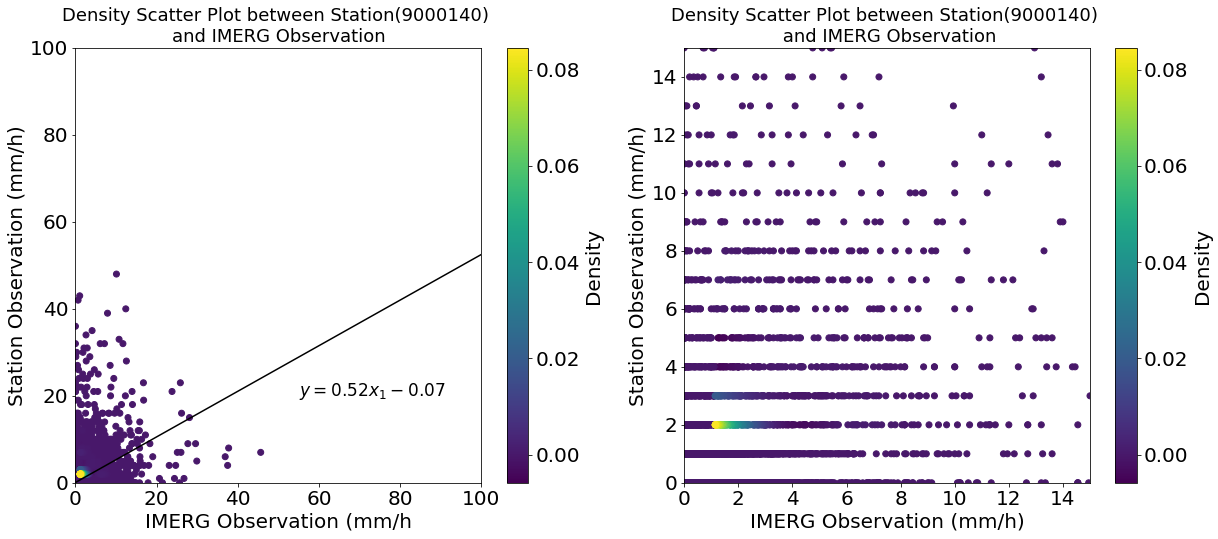

In [47]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.11 STA. 9000233

In [48]:
st_id = "9000233"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(9000233) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

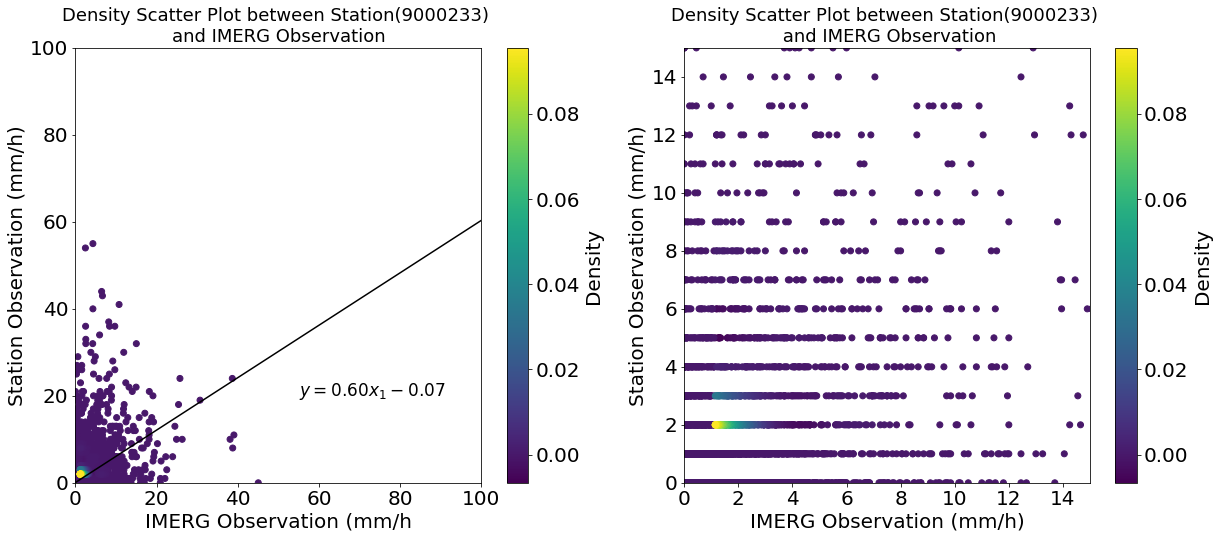

In [49]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 12.12 STA. 9000234

In [50]:
st_id = "9000234"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(9000234) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

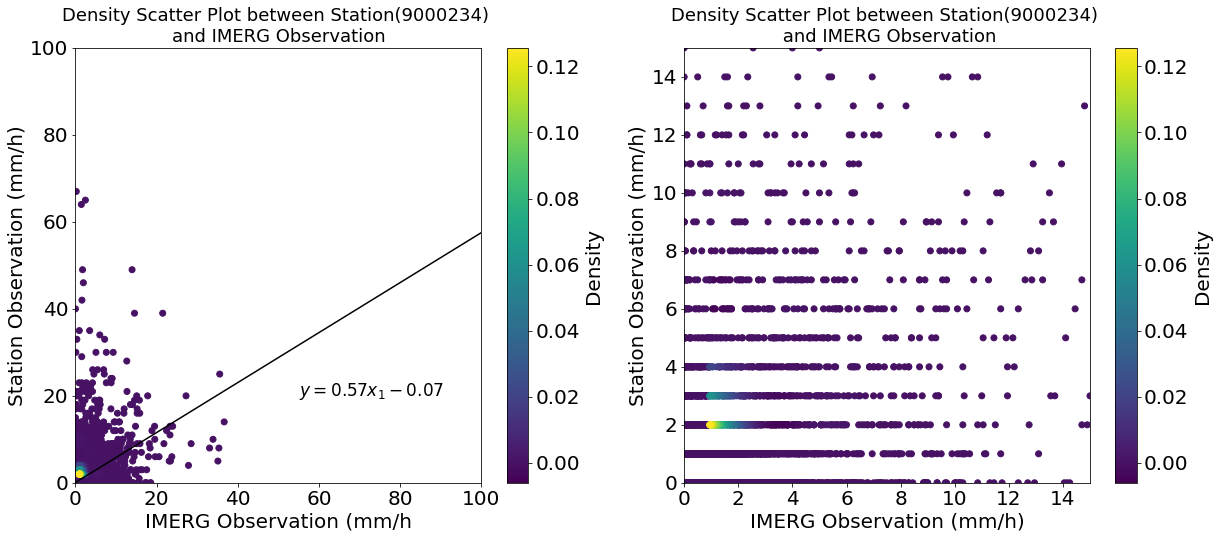

In [51]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case1[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case1[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case1[gpm_id]
y1 = df_hourly_all_case1[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

## 13. (Case-2) Station관측과 IMERG자료의 선형분석 및 Visualization

### 13.1 STA. 4001430

In [52]:
st_id = "4001430"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4001430) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

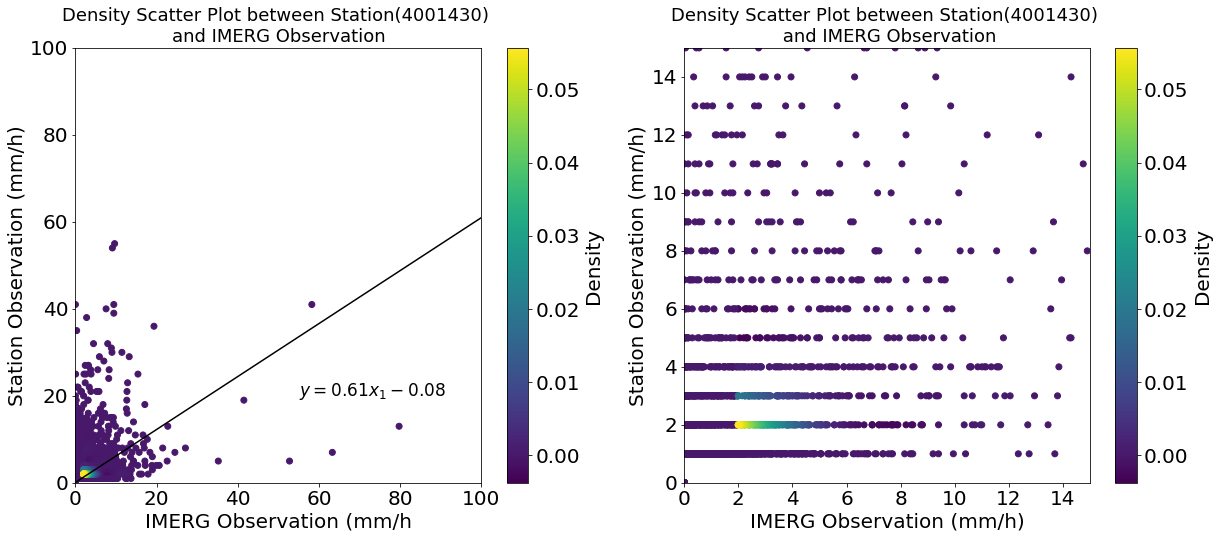

In [53]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.2 STA. 4001440

In [54]:
st_id = "4001440"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4001440) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

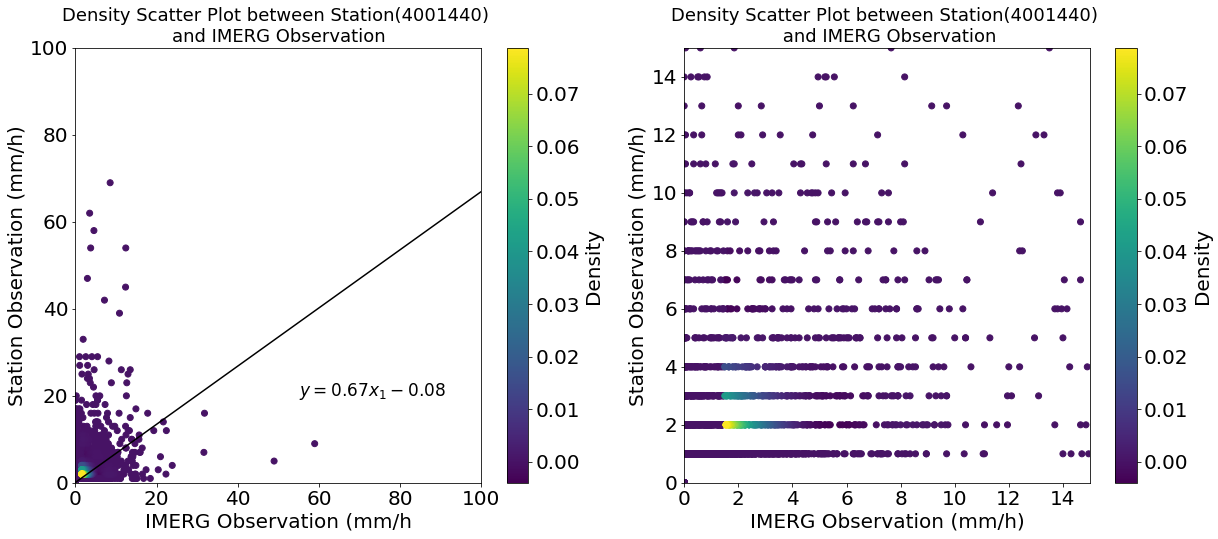

In [55]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.3 STA. 4001450

In [56]:
st_id = "4001450"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4001450) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

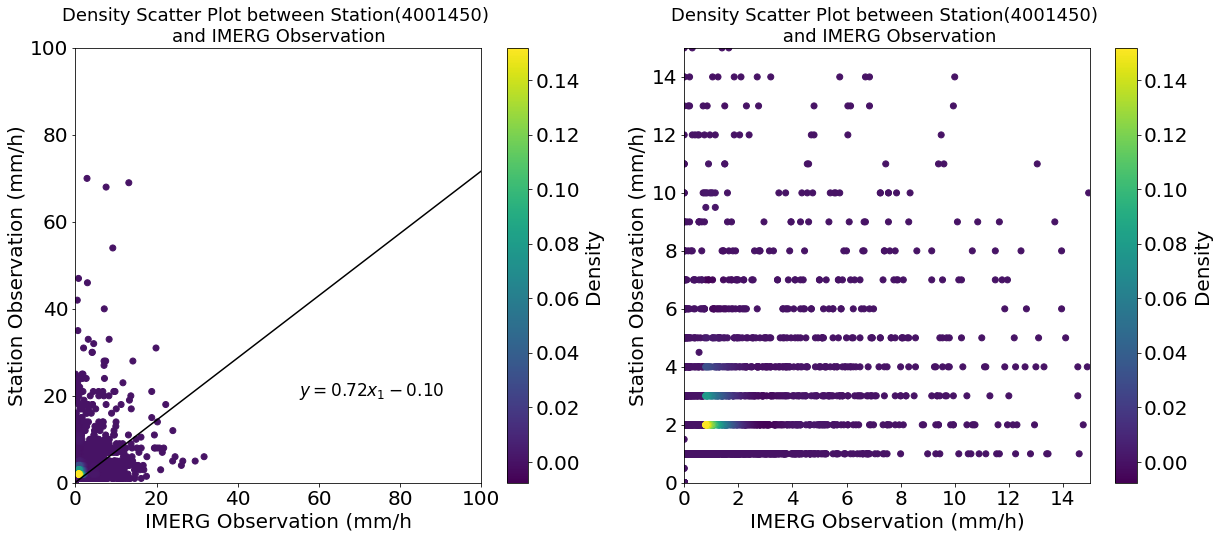

In [57]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.4 STA. 4003420

In [58]:
st_id = "4003420"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4003420) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

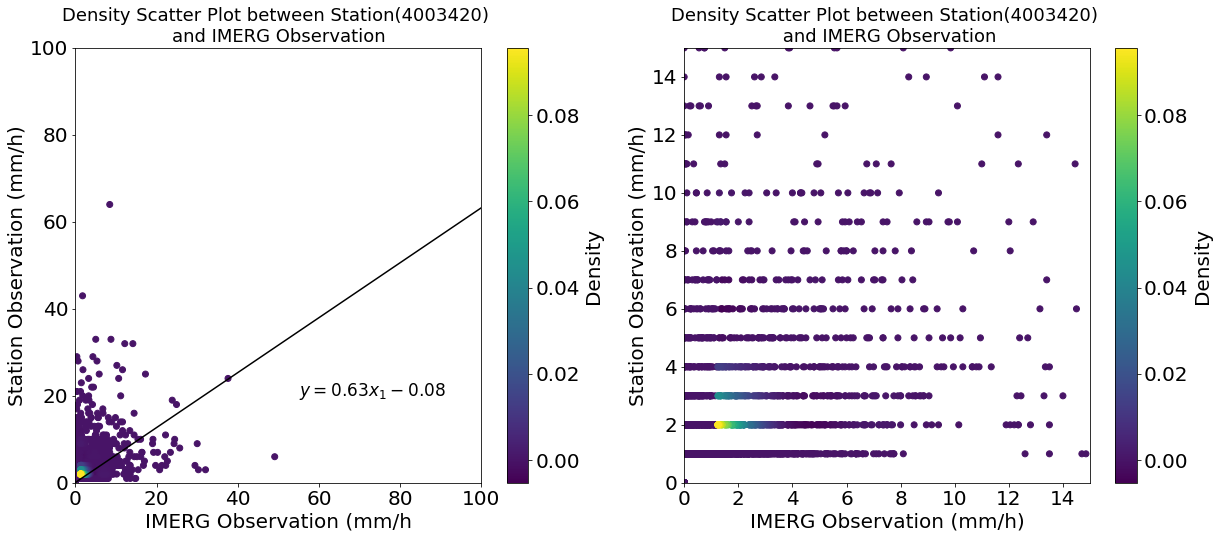

In [59]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.5 STA. 4007450

In [60]:
st_id = "4007450"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007450) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

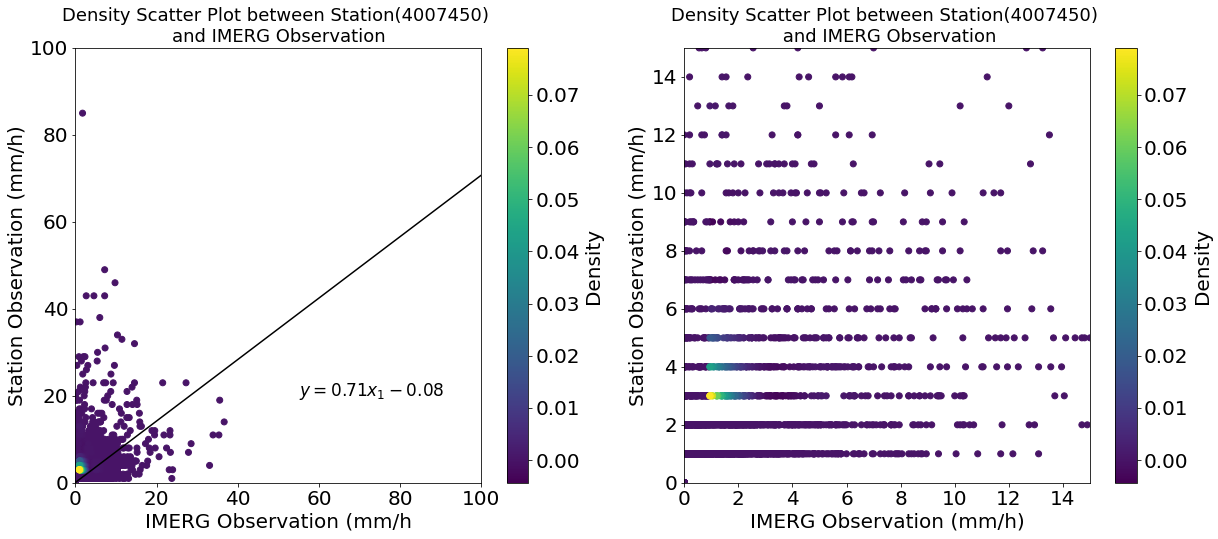

In [61]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.6 STA. 4007470

In [62]:
st_id = "4007470"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007470) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

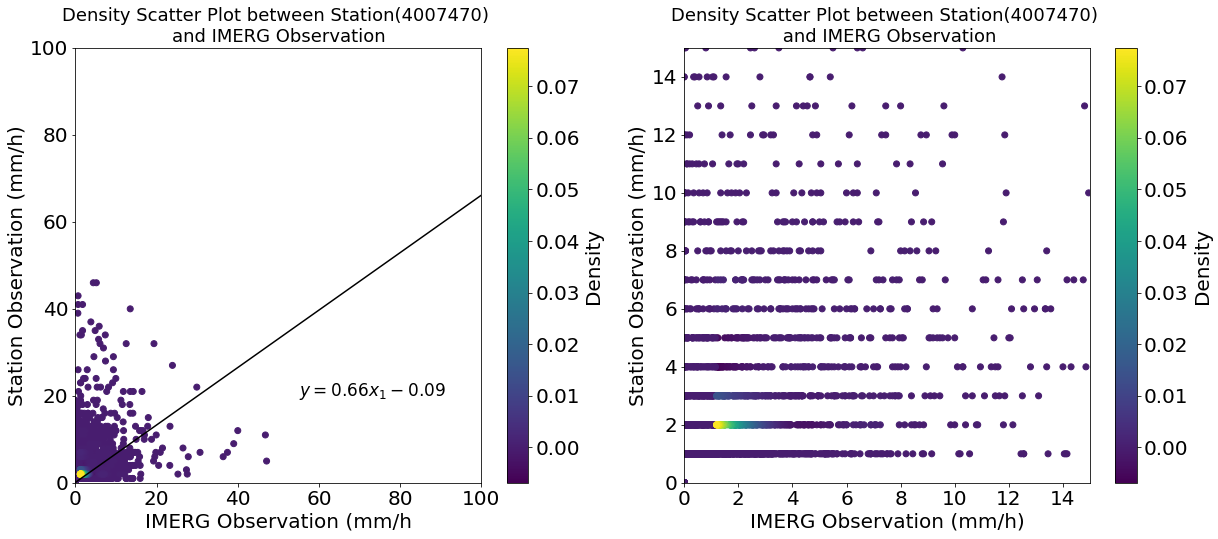

In [63]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.7 STA. 4007472

In [64]:
st_id = "4007472"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007472) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

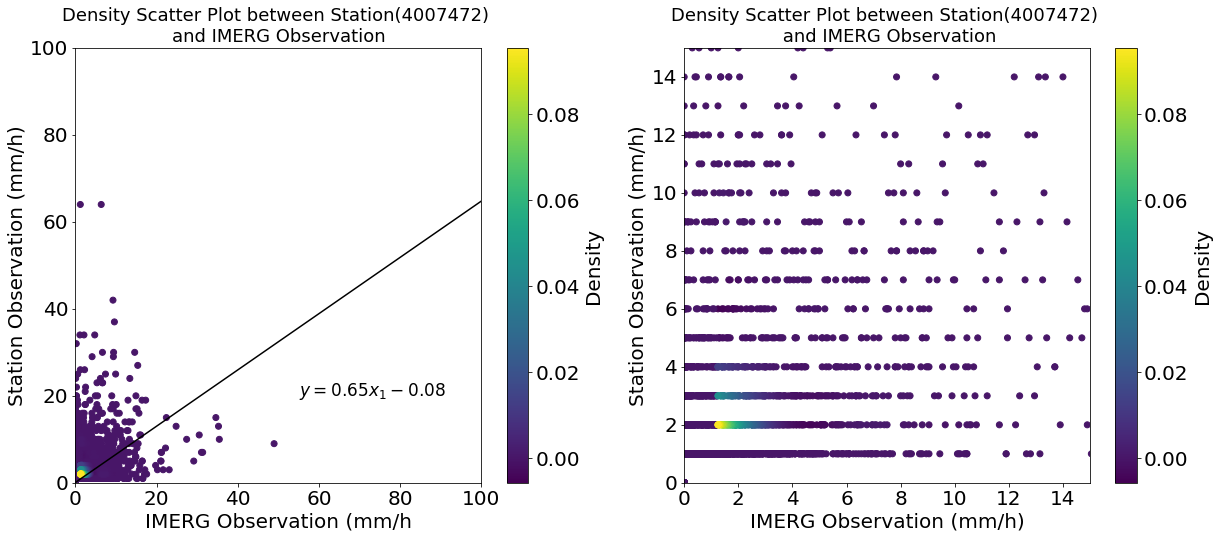

In [65]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.8 STA. 4007474

In [66]:
st_id = "4007474"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4007474) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

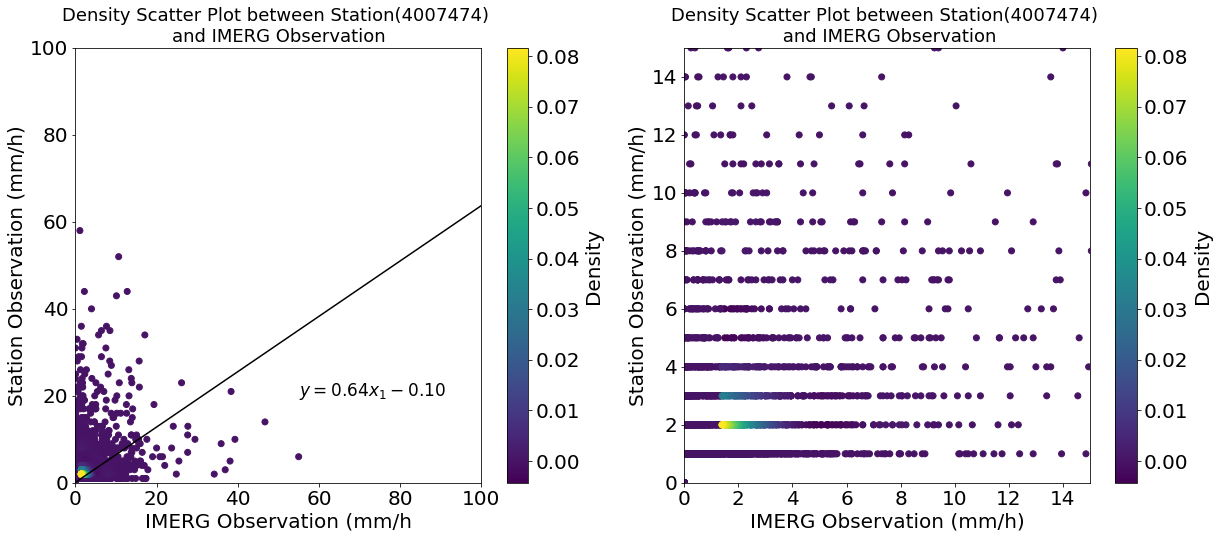

In [67]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.9 STA. 4009460

In [68]:
st_id = "4009460"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(4009460) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

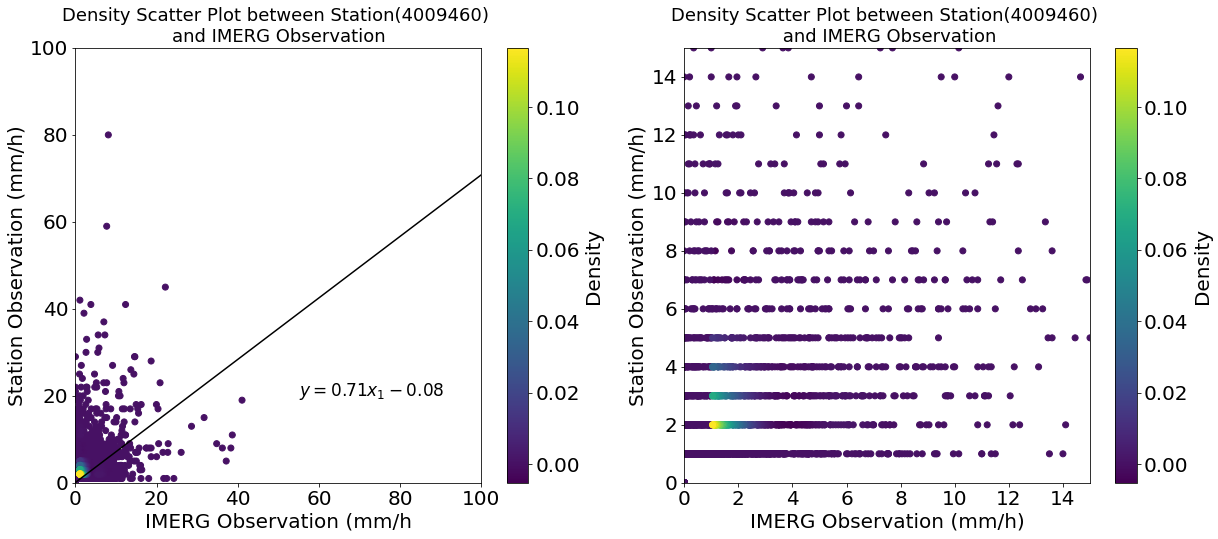

In [69]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.10 STA. 9000140

In [70]:
st_id = "9000140"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(9000140) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

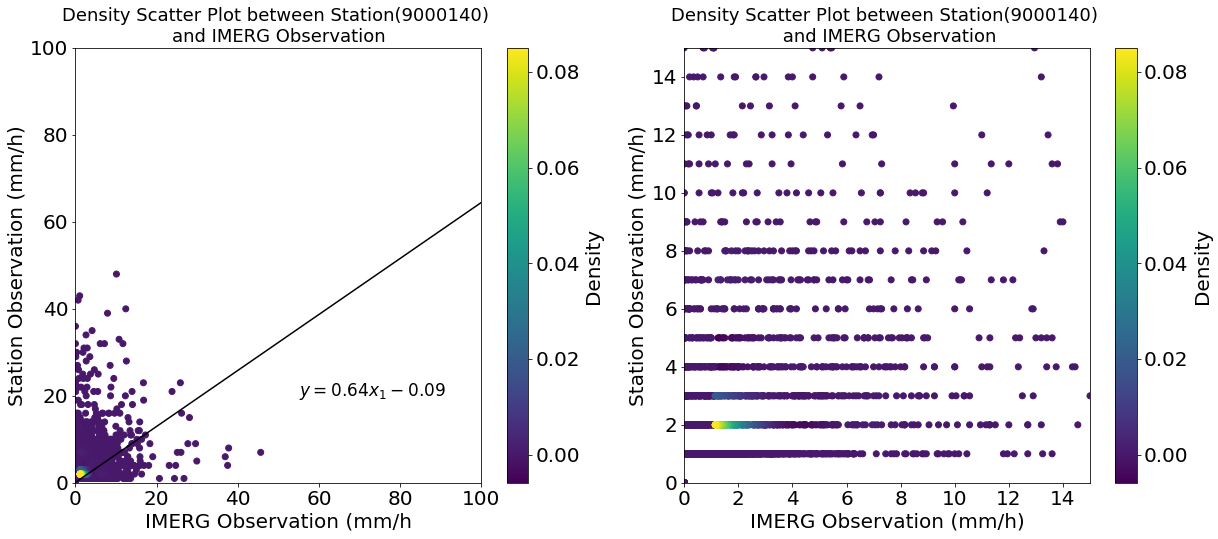

In [71]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.11 STA. 9000233

In [72]:
st_id = "9000233"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(9000233) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

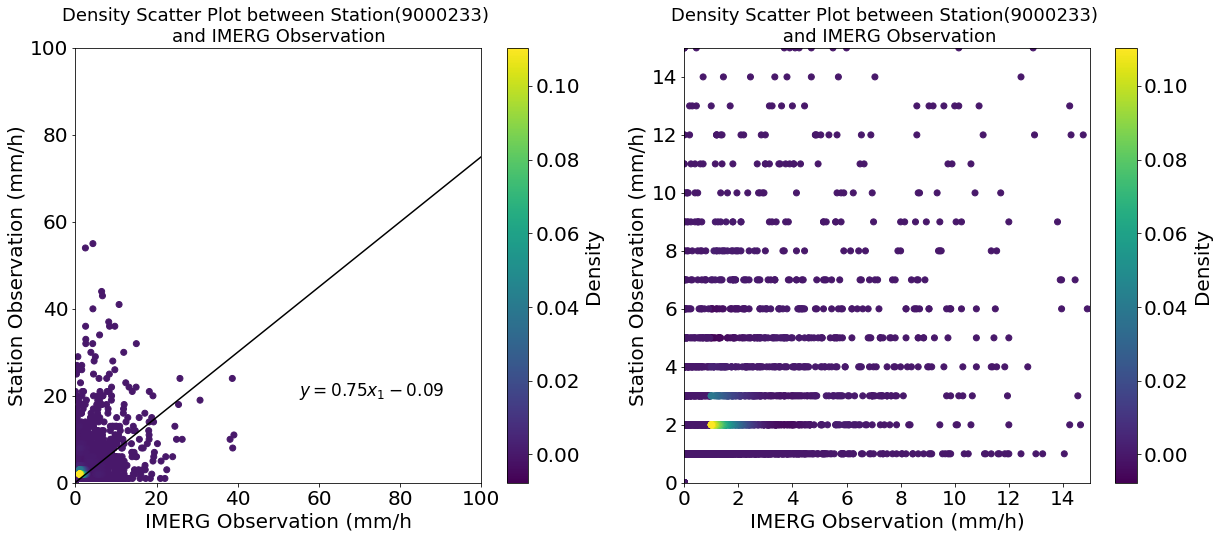

In [73]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])

### 13.12 STA. 9000234

In [74]:
st_id = "9000234"
gpm_id = st_id+"_gpm"

/tmp/ipykernel_23653/1168967900.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=20)
/tmp/ipykernel_23653/1168967900.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=20)


<AxesSubplot:title={'center':'Density Scatter Plot between Station(9000234) \n and IMERG Observation'}, xlabel='IMERG Observation (mm/h)', ylabel='Station Observation (mm/h)'>

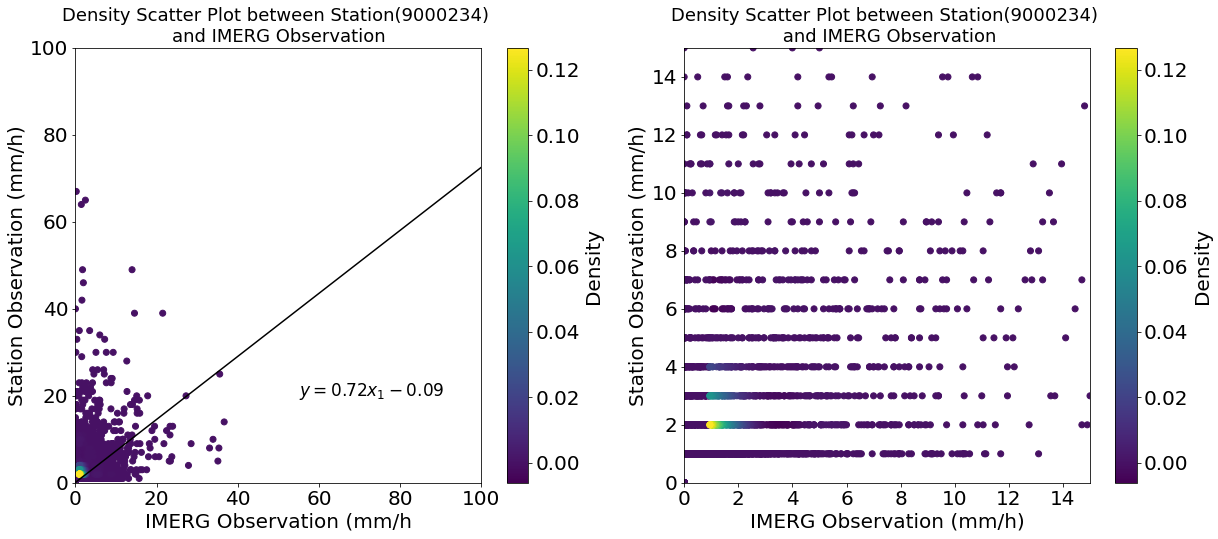

In [75]:
ols = linear_model.LinearRegression()
X = df_hourly_all_case2[gpm_id].values.reshape(-1, 1)
y = df_hourly_all_case2[st_id].values
model = ols.fit(X, y)
x1 = df_hourly_all_case2[gpm_id]
y1 = df_hourly_all_case2[st_id]
density_scatter(x1, y1, int(st_id), bins = [20,20])